# Load Dataset -  Drive mount


In [1]:
import numpy as np
import pandas as pd

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Text Handling Libraries
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Construct the download URL
file_id = '1qbPUoK7BMwXLVbJumSSflYSNsoD6A77Z'
download_url = f'https://drive.google.com/uc?id={file_id}'

# Read the CSV file into a DataFrame
df = pd.read_csv(download_url)

df

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
...,...,...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."


# Drop null values

In [4]:
df.shape

(27555, 10)

In [5]:
df.isnull().sum()

,0
index,0
product,1
category,0
sub_category,0
brand,1
sale_price,0
market_price,0
type,0
rating,8626
description,115


In [7]:
df = df.dropna()

# Excel sheet - modified data (after removing null data)

In [8]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1bddj8WzqHJS5wOpl7DtT6MUJO9noVnYS1NzlQz-uTDY#gid=0


# EDA

In [9]:
counts = df['category'].value_counts()
counts_df = pd.DataFrame({'Category':counts.index,'Counts':counts.values})
counts_df

,Category,Counts
0,Beauty & Hygiene,5460
1,"Kitchen, Garden & Pets",2494
2,Snacks & Branded Foods,2468
3,Gourmet & World Food,2364
4,"Foodgrains, Oil & Masala",2173
5,Cleaning & Household,2091
6,"Bakery, Cakes & Dairy",665
7,Beverages,630
8,Baby Care,495


In [10]:
px.bar(data_frame=counts_df,
 x='Category',
 y='Counts',
 color='Counts',
 color_continuous_scale='blues',
 text_auto=True,
 title=f'Count of Items in Each Category')

In [11]:
counts = df['sub_category'].value_counts()
counts_df_1 = pd.DataFrame({'Category':counts.index,'Counts':counts.values})[:10]
counts_df_1

,Category,Counts
0,Skin Care,1641
1,Hair Care,818
2,Bath & Hand Wash,808
3,Masalas & Spices,764
4,Storage & Accessories,658
5,Men's Grooming,649
6,Fragrances & Deos,627
7,Crockery & Cutlery,621
8,Ready To Cook & Eat,557
9,Organic Staples,550


In [12]:
px.bar(data_frame=counts_df_1,
 x='Category',
 y='Counts',
 color='Counts',
 color_continuous_scale='blues',
 text_auto=True,
 title=f'Top 10 Bought Sub_Categories')

In [13]:
counts = df['brand'].value_counts()
counts_df_brand = pd.DataFrame({'Brand Name':counts.index,'Counts':counts.values})[:10]
counts_df_brand

,Brand Name,Counts
0,bb Royal,278
1,BB Home,172
2,Amul,153
3,Himalaya,139
4,Cello,104
5,BIOTIQUE,103
6,DP,101
7,Keya,101
8,Organic Tattva,99
9,MTR,97


In [14]:
px.bar(data_frame=counts_df_brand,
 x='Brand Name',
 y='Counts',
 color='Counts',
 color_continuous_scale='blues',
 text_auto=True,
 title=f'Top 10 Brand Items based on Item Counts')

In [16]:
counts = df['type'].value_counts()
counts_df_type = pd.DataFrame({'Type':counts.index,'Counts':counts.values})[:10]
counts_df_type

,Type,Counts
0,Face Care,1094
1,Men's Deodorants,404
2,Shampoo & Conditioner,390
3,Blended Masalas,343
4,Containers Sets,332
5,Bathing Bars & Soaps,322
6,Glassware,263
7,Body Care,251
8,Namkeen & Savoury Snacks,234
9,Hand Wash & Sanitizers,212


In [17]:
px.bar(data_frame=counts_df_type,
 x='Type',
 y='Counts',
 color='Counts',
 color_continuous_scale='blues',
 text_auto=True,
 title=f'Top 10 Types of Products based on Item Counts')

In [18]:
avg= df['rating'].mean()
avg

3.9430626326963902

In [19]:
# avg rating 3.5 : recommends only porduct above avg rating.
# sorts based on numerical column  - default numerical column considered : rating
# returns prdoct,brand,sales_price and rating colum
def sort_recommendor(col='rating',sort_type = False):
    rated_recommend = df.copy().loc[df['rating'] >= 3.5]
    if rated_recommend[col].dtype == 'O':
        col='rating'
    rated_recommend = rated_recommend.sort_values(by=col,ascending = sort_type)
    return rated_recommend[['product','brand','sale_price','rating']].head(10)

In [20]:
# top 10 products based on sales price - user defined function
sort_recommendor(col='sale_price',sort_type=False)

,product,brand,sale_price,rating
1766,Good Girl Eau De Parfum For Women,Carolina Herrera,6660.0,5.0
12192,Man In Black Eau De Parfum,Bvlgari,6100.0,4.0
21637,"Casserole Set - Die-Cast, Induction Base, Granite",Wonderchef,6000.0,5.0
17767,Eau De Toilette For Men,Bentley,4905.0,5.0
13559,"Dog Food - Super Premium, Focus, Puppy, Limite...",Drools,4675.0,4.6
27538,Quista Pro Advanced Whey Protein Formula forti...,Himalaya,4500.0,4.0
2365,Pro Expert Nutrition Large Breed Puppy (3-18 M...,Pedigree,4480.0,5.0
6451,Extra Virgin Olive Oil,Pietro Coricelli,4400.0,4.7
22714,Olive Oil - Refined Pomace Mild,Basso,4399.0,5.0
17076,Olive Pomace Oil,Abbies,4399.0,4.5


In [21]:
# inbuilt methods.
df[df['rating'] >= 3.5].sort_values(by='sale_price', ascending=False).head(10)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
1766,1767,Good Girl Eau De Parfum For Women,Beauty & Hygiene,Fragrances & Deos,Carolina Herrera,6660.0,7400.0,Eau De Parfum,5.0,Well behaved girls rarely make history...GOOD ...
12192,12193,Man In Black Eau De Parfum,Beauty & Hygiene,Fragrances & Deos,Bvlgari,6100.0,6100.0,Eau De Parfum,4.0,It opens with accords of natural rum and lumin...
21637,21638,"Casserole Set - Die-Cast, Induction Base, Granite","Kitchen, Garden & Pets",Cookware & Non Stick,Wonderchef,6000.0,6000.0,Cookware Sets,5.0,"A reflection of classic and elegance, this mul..."
17767,17768,Eau De Toilette For Men,Beauty & Hygiene,Fragrances & Deos,Bentley,4905.0,5450.0,Eau De Toilette,5.0,"Gentlemen, make way for Bentley for Men, the f..."
13559,13560,"Dog Food - Super Premium, Focus, Puppy, Limite...","Kitchen, Garden & Pets",Pet Food & Accessories,Drools,4675.0,5500.0,Pet Meals & Treats,4.6,Drools Optimum Performance Adult Pet food is a...
27538,27539,Quista Pro Advanced Whey Protein Formula forti...,Beauty & Hygiene,Health & Medicine,Himalaya,4500.0,4500.0,Supplements & Proteins,4.0,Quista Pro is a whey protein blend that helps ...
2365,2366,Pro Expert Nutrition Large Breed Puppy (3-18 M...,"Kitchen, Garden & Pets",Pet Food & Accessories,Pedigree,4480.0,5600.0,Pet Meals & Treats,5.0,Different dog breeds have different nutritiona...
6451,6452,Extra Virgin Olive Oil,Gourmet & World Food,Oils & Vinegar,Pietro Coricelli,4400.0,4400.0,Extra Virgin Olive Oil,4.7,"Since 1939, the family-owned and managed Pietr..."
22714,22715,Olive Oil - Refined Pomace Mild,Gourmet & World Food,Oils & Vinegar,Basso,4399.0,4399.0,"Pure, Pomace Olive Oil",5.0,Basso Refined Pomace Mild Olive Oil: Oil Compr...
17076,17077,Olive Pomace Oil,Gourmet & World Food,Oils & Vinegar,Abbies,4399.0,4399.0,"Pure, Pomace Olive Oil",4.5,Abbie's olive oil is made with care and passio...


# First Recommender System (TF-IDF)

  * Uses TF-IDF (Term Frequency-Inverse Document Frequency) to vectorize product descriptions.
  * Computes cosine similarity between products.
  * Retrieves the top 10 most similar products based on description similarity.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import pandas as pd

# TF-IDF Vectorizer setup
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['description'])

# Compute cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Create a Series to map product titles to indices
indices = pd.Series(df.index, index=df['product']).drop_duplicates()

# Function to get recommendations based on product title
def get_recommendations_1(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get top 10 similar products
    movie_indices = [i[0] for i in sim_scores]
    return df['product'].iloc[movie_indices]

# Example usage
print(get_recommendations_1('Water Bottle - Orange'))
print(get_recommendations_1('Cadbury Perk - Chocolate Bar'))


11320    Rectangular Plastic Container - With Lid, Mult...
11642                               Jar - With Lid, Yellow
26451     Round & Flat Storage Container - With lid, Green
6163     Premium Rectangular Plastic Container With Lid...
9546     Premium Round Plastic Container With Lid - Yellow
13959    Premium Rectangular Plastic Container With Lid...
19381    Premium Round & Flat Storage Container With Li...
24255      Premium Round Plastic Container With Lid - Blue
26067    Premium Round Plastic Container With Lid - Mul...
26074      Premium Round Plastic Container With Lid - Pink
Name: product, dtype: object
17385                                Cashew Nuts - Salted
23126                        Nutrione - Baked Cashew Nuts
11962    Signature Roasted & Salted Cashew/Godambi - W240
23600                                             Cashews
11947                               Sunflower Seeds - Raw
8765                                     Chilli Nut Chaat
1986                         Whol

# Second Recommender System (CountVectorizer)

  * Uses CountVectorizer instead of TF-IDF.
  * Instead of using just description, it creates a new feature soup by combining:
    - category
    - sub_category
    - brand
    - type
  * Computes cosine similarity again and retrieves top 10 similar products.

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re

# Data preprocessing
df2 = df.copy()

# Helper functions for processing attributes
rmv_spc = lambda a: a.strip()
get_list = lambda a: list(map(rmv_spc, re.split('& |, |\*|\n', a)))

# Apply the helper functions
for col in ['category', 'sub_category', 'type']:
    df2[col] = df2[col].apply(get_list)

# Cleaner function for text formatting
def cleaner(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

# Clean the relevant columns
for col in ['category', 'sub_category', 'type', 'brand']:
    df2[col] = df2[col].apply(cleaner)

# Combine all relevant columns into a single text field 'soup'
def couple(x):
    return ' '.join(x['category']) + ' ' + ' '.join(x['sub_category']) + ' ' + x['brand'] + ' ' + ' '.join(x['type'])

df2['soup'] = df2.apply(couple, axis=1)

# Vectorize the 'soup' column and calculate cosine similarity
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

# Create a Series to map product titles to indices
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['product'])

# Function to get recommendations based on product title
def get_recommendations_2(title, cosine_sim=cosine_sim2):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get top 10 similar products
    movie_indices = [i[0] for i in sim_scores]
    return df2['product'].iloc[movie_indices]

print(get_recommendations_2('Water Bottle - Orange'))
print(get_recommendations_2('Cadbury Perk - Chocolate Bar'))


109           Glass Water Bottle - Aquaria Organic Purple
705     Glass Water Bottle With Round Base - Transpare...
1155                  H2O Unbreakable Water Bottle - Pink
1500                              Water Bottle H2O Purple
1828                 H2O Unbreakable Water Bottle - Green
1976     Regel Tritan Plastic Sports Water Bottle - Black
2182              Apsara 1 Water Bottle - Assorted Colour
2361    Glass Water Bottle With Round Base - Yellow, B...
2485    Trendy Stainless Steel Bottle With Steel Cap -...
2515    Penta Plastic Pet Water Bottle - Violet, Wide ...
Name: product, dtype: object
962                               Nutties Chocolate Pack
979                                 5 Star Chocolate Bar
1090            Dairy Milk Silk - Hazelnut Chocolate Bar
2071    Perk - Chocolate, Home Treats, 175.5 g, 27 Units
5203                             Dark Milk Chocolate Bar
5491              Dairy Milk Silk Mousse - Chocolate Bar
5986                             Dark Milk Chocol

In [29]:
# Example usage with comparison
old_rec = get_recommendations_1('Water Bottle - Orange').values
new_rec = get_recommendations_2('Water Bottle - Orange', cosine_sim2).values

# Compare old and new recommender results
pd.DataFrame({'Old Recommender': old_rec, 'New Recommender': new_rec})


,Old Recommender,New Recommender
0,"Rectangular Plastic Container - With Lid, Mult...",Glass Water Bottle - Aquaria Organic Purple
1,"Jar - With Lid, Yellow",Glass Water Bottle With Round Base - Transpare...
2,"Round & Flat Storage Container - With lid, Green",H2O Unbreakable Water Bottle - Pink
3,Premium Rectangular Plastic Container With Lid...,Water Bottle H2O Purple
4,Premium Round Plastic Container With Lid - Yellow,H2O Unbreakable Water Bottle - Green
5,Premium Rectangular Plastic Container With Lid...,Regel Tritan Plastic Sports Water Bottle - Black
6,Premium Round & Flat Storage Container With Li...,Apsara 1 Water Bottle - Assorted Colour
7,Premium Round Plastic Container With Lid - Blue,"Glass Water Bottle With Round Base - Yellow, B..."
8,Premium Round Plastic Container With Lid - Mul...,Trendy Stainless Steel Bottle With Steel Cap -...
9,Premium Round Plastic Container With Lid - Pink,"Penta Plastic Pet Water Bottle - Violet, Wide ..."


In [28]:
old_rec = get_recommendations_1('Cadbury Perk - Chocolate Bar').values
new_rec = get_recommendations_2('Cadbury Perk - Chocolate Bar', cosine_sim2).values

# Compare old and new recommender results
pd.DataFrame({'Old Recommender': old_rec, 'New Recommender': new_rec})

,Old Recommender,New Recommender
0,Cadbury Perk - Chocolate Bar,Nutties Chocolate Pack
1,Choco Stick - Hexagon Pack,5 Star Chocolate Bar
2,Luvit Chocwich White Home Delights 187 g,Dairy Milk Silk - Hazelnut Chocolate Bar
3,Luvit Chocwich Home Delights 187 g,"Perk - Chocolate, Home Treats, 175.5 g, 27 Units"
4,Wafer Biscuits - Chocolate Flavor,Dark Milk Chocolate Bar
5,Drinking Chocolate - Original,Dairy Milk Silk Mousse - Chocolate Bar
6,Drinking Chocolate - Original,Dark Milk Chocolate Bar
7,Biscuit - Bourbon Creams,Chocolate Bar - Fuse
8,Wafers With Hazelnut Cream,Choclairs Gold Coffee
9,Choco Stick - Chocolate,"5 Star Chocolate Home Pack, 200 g, 20 units"


# STL IMPLEMENTTAION

In [30]:
import pandas as pd
import numpy as np

# Define category-based date frequency
category_frequencies = {
    "Beauty & Hygiene": "7D",
    "Gourmet & World Food": "3D",
    "Kitchen, Garden & Pets": "15D",
    "Snacks & Branded Foods": "5D",
    "Foodgrains, Oil & Masala": "20D",
    "Cleaning & Household": "10D",
    "Beverages": "2D",
    "Bakery, Cakes & Dairy": "2D",
    "Baby Care": "7D",
    "Fruits & Vegetables": "1D",
    "Eggs, Meat & Fish": "2D",
    "Others": "30D"
}

# Set date range
start_date = pd.Timestamp("2020-01-01")
end_date = pd.Timestamp("2024-01-01")
days_range = (end_date - start_date).days
DF3 = df.copy()
# Handle missing categories
DF3["category"] = DF3["category"].fillna("Others")

# Generate random dates for each row based on category frequency
DF3["date"] = DF3["category"].apply(lambda x: start_date + pd.to_timedelta(np.random.randint(0, days_range), unit="D"))

# Sort by date for time series analysis
DF3 = DF3.sort_values("date").reset_index(drop=True)
DF3.set_index('date', inplace=True)
DF3

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,soup
date,,,,,,,,,,,
2020-01-01,516,Amritsari Chhole Masala,"foodgrains,oil&masala",masalas&spices,keya,40.95,63.0,blendedmasalas,4.1,Keya Khada Masala blends are whole spice mixes...,"foodgrains,oil&masala masalas&spices keya blen..."
2020-01-01,20894,Germ Protection Fruit & Veggie Wash – Natural ...,cleaning&household,allpurposecleaners,godrejprotekt,199.20,249.0,disinfectantspray&cleaners,4.0,Godrej Protekt Germ Protection Fruit & Veggie ...,cleaning&household allpurposecleaners godrejpr...
2020-01-01,21908,Arhar (Tur) Dal,"foodgrains,oil&masala",organicstaples,organictattva,240.00,240.0,organicdals&pulses,4.0,Organic TattvaÃ¢â‚¬â„¢s Arhar dal is trusted b...,"foodgrains,oil&masala organicstaples organicta..."
2020-01-01,4908,Dough Set - Assorted Colours,cleaning&household,stationery,sterling,499.00,499.0,games&calculators,4.2,"This Dough Set is a magic dough, which is a fu...",cleaning&household stationery sterling games&c...
2020-01-01,14975,Wafers - Chocolate,gourmet&worldfood,chocolates&biscuits,harveys,67.50,75.0,"cookies,biscotti,wafer",3.8,Harveys Wafers are crispy and crunchy wafers w...,gourmet&worldfood chocolates&biscuits harveys ...
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,12245,Traditional Pure Iron Flat Bottom Fry Pan - 10...,"kitchen,garden&pets",cookware&nonstick,trm,479.00,745.0,kadai&frypans,4.0,TRM Traditional Pure Iron Fry Pan is made of p...,"kitchen,garden&pets cookware&nonstick trm kada..."
2023-12-31,732,"Clothes Storage Laundry Bag - Text Printed, Bl...",cleaning&household,bins&bathroomware,dp,519.00,528.0,"laundry,storagebaskets",4.0,"This blue laundry bag helps you sort laundry, ...",cleaning&household bins&bathroomware dp laundr...
2023-12-31,14304,Onion Flakes,"foodgrains,oil&masala",masalas&spices,keya,69.30,99.0,herbs&seasoning,4.5,Keya Onion flakes are carefully chosen to give...,"foodgrains,oil&masala masalas&spices keya herb..."


<ipython-input-33-6a29f7fff64d>:4: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



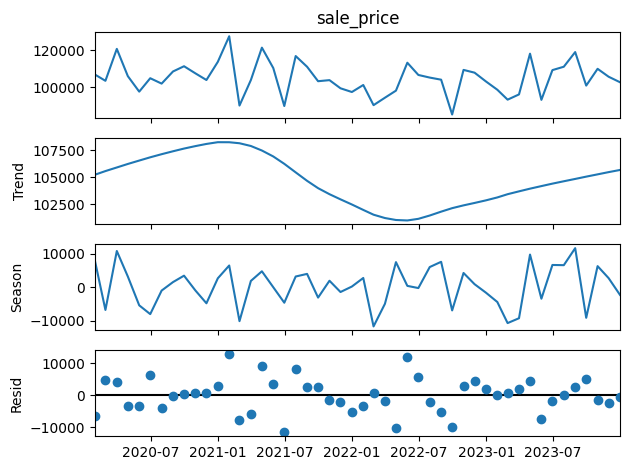

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
df_monthly = DF3.resample('M').sum() # month based sum
stl = STL(df_monthly['sale_price'], period=12)  # Seasonal-Trend Decomposition
result = stl.fit()
result.plot()
#plt.title('STL Decomposition of Sales Data')
plt.show()